# Is Amazon Degradation Increasing?
#### _An exploratory data analysis to find out what the data has to tell us about Amazon deforestation._

### Introduction

This kernel will analyze datasets of two different programs of [INPE](http://www.inpe.br/dados_abertos/).

1) [BDQ](http://queimadas.dgi.inpe.br/queimadas/bdqueimadas/) (Banco de Dados de Queimadas, or Fires Database): 
- Methodology: detects **fire outbreaks** through satellite images, updated every 3 hours.
- Data: amount of fire outbreaks by state, month and year, from 1999 to 2019.
- Data obtainment: The data were extracted on December 13th 2019, always from the filtering for the reference salellite and aggregated using Postgres SQL.


2) [PRODES](http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/prodes) (Programa de Monitoramento da Floresta Amazônica Brasileira por Satélite, or Brazilian Amazon Rainforest Monitoring Program by Satellite):
- Methodology: PRODES maps primary **forest loss** using satellite imagery, with 20 to 30 meters of spatial resolution and 16-day revisit rate, in a combination that seeks to minimize the problem of cloud cover and ensure interoperability criteria.
- Data: Deforestation area (km²) by year and state, from 2004 to 2019.
- Data obtainment: The data were extracted on December 16th. It was already aggregated, so, no data process was made.
    
    
**It is important to note that there are many other forest biomes in Brazil in the same kind of danger, and also that Amazon is not only above Brazilian territory.** 

Feedback is extremly welcome. I hope you enjoy this work and can get some useful insight or piece of code from it.

### Objectives

The importance of the Amazon rainforest for the balance of the world environment is unquestionable. This kernel will analyze the deforestation in the 9 Brazil states where Amazon biome can be found through the analysis of two INPE programs (amount of fire outbreaks of BDQ, and deforestation area of PRODES). 

We want to know what the data has to say about:
- **Is Brazilian Amazon Rainforest degradation increasing?**
- **What is the behavior of fires: where and when do they occur?**
- **How correlated is the number of fire outbreaks and the deforested area?**
- **What is the effect of climate phenomenas El Niño and La Niña on Amazon degradation?**
- **Are there evidences of natural/unnatural causes in forest degradation?**

### Contextualization

The Amazon rainforest is a moist broadleaf tropical rainforest in the Amazon biome that covers territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. The total area is 5,500,000 square kilometres (2,123,562 square miles).

Specifically in Brazil, the Amazon forest covers the territory of 9 of its states. They are: Acre, Amapa, Amazonas, Maranhao, Mato Grosso, Para, Rondonia, Roraima and Tocantins.

<img src="https://cdn-cf.tucantravel.com/images/Experiences/WILDLIFE_HOLIDAY_TOURS/AMAZON-JUNGLE-MAP-IN-SOUTH-AMERICA.jpg" alt="Fires in Brazilian Amazon rainforest" class="center">

<center align="center"><b>Figure 1</b>: Amazon rainforest in South America (represented in <b><font color="green">green</font></b>). Source: <a href='www.google.com'>Google</a></center> 

The region provides important benefits to communities living near and far. Nearly 500 indigenous communities call the Amazon rainforest home. It’s a highly biodiverse ecosystem, home to untold species of plants and animals. The rainforest can create its own weather and influence climates around the world. Unfortunately, the fragile ecosystem faces the constant threat of deforestation and fires (for natural or anthropogenic causes).

<img src="https://www.dw.com/image/50112402_303.jpg" alt="Fires in Brazilian Amazon rainforest" class="center">

<center align="center"><b>Figure 2</b>: Fires in Brazilian Amazon rainforest. Source: <a href='https://www.dw.com/en/brazil-forest-fires-rage-as-farmers-push-into-the-amazon/a-50116455'>DW</a></center> 

Deforestation happens for many reasons, such as illegal agriculture, natural disasters, urbanization and mining. There are several ways to remove forests - burning and logging are two methods. Although deforestation is happening all over the world today, it is an especially critical issue in the Amazon rainforests, as the only large forest still standing in the world. There, the species of plants and animals they harbor have been disappearing at an alarming rate. Source: [INPE](http://www.inpe.br/)

---
---

# 1 - Fires outbreaks (BDQ)

## 1.1 - Dataset Summary

### General information (Original dataset):
- Format: CSV
- Number of rows: 2456247 (total)
- Number of columns: 12 (in Portuguese, translated to English below): 
    - datahora = datetime
    - satelite = satellite
    - pais = country
    - municipio = city
    - bioma = biome
    - diasemchuva = days without rain
    - precipitacao = rainfall
    - riscofogo = risk of fire
    - latitude = latitude
    - longitude = longitude
    - frp = fire radiative power
        


---

## 1.2 - Data preparation using SQL

Since the original data had too many rows, the first thing I did was to process them using PostgresSQL and select only the data I wanted.

I aggregated the fire outbreaks by year, month and state, counting the number of occurrences and taking to average of latitude and longitude.

The code used in SQL was as follows:

```SQL
SELECT 
    EXTRACT(YEAR FROM datahora) as year,
    EXTRACT(MONTH FROM datahora) as month,
    estado as state,
    AVG(latitude) as latitude,
    AVG(longitude) as longitude,
    COUNT(estado)  as firespots
    
FROM south_america_fires 

GROUP BY 
    EXTRACT(YEAR FROM datahora), 
    EXTRACT(MONTH FROM datahora), 
    estado

ORDER BY year;
```

### General information (Aggregated dataset):
After processing using SQL the dataset has the following shape:
- Format: CSV
- Number of rows: 2104
- Number of columns: 6
- Features:
    - **year**: Year of occurrence
    - **month**: Month of occurrence
    - **state**: State of occurrence
    - **latitude**: Average latitude of all occurrences in this month, year and state
    - **longitude**: Average longitude of all occurrences in this month, year and state
    - **firespots**: Number of forest fire outbreaks

---

## 1.3 - Importing Libraries and Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

%matplotlib inline

In [2]:
# Different encoding to read brazilian data
amazonfires = pd.read_csv("../input/brazilian-amazon-rainforest-degradation/inpe_brazilian_amazon_fires_1999_2019.csv", encoding='LATIN1')

In [3]:
amazonfires.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


---

## 1.4 - Data Analysis

### 1.4.1 - An overview

First, I want to analyse the situation in an overview, detecting the fire outbreaks by year, month and state.

#### **Year**

The graph below shows the **sum** of fire outbreaks in Amazon detected by INPE for each year since 1999. The confidence band is of 95%.

It seems that, overall, the number of fire outbreaks in the Amazon had a really important peak in 2002 and, after this year, decreased little by little until 2011. From this point to today, a little increase in the number of fires outbreaks can be noted. 

Please note that the data from 2019 is not complete, since it was extracted at December 13th 2019.

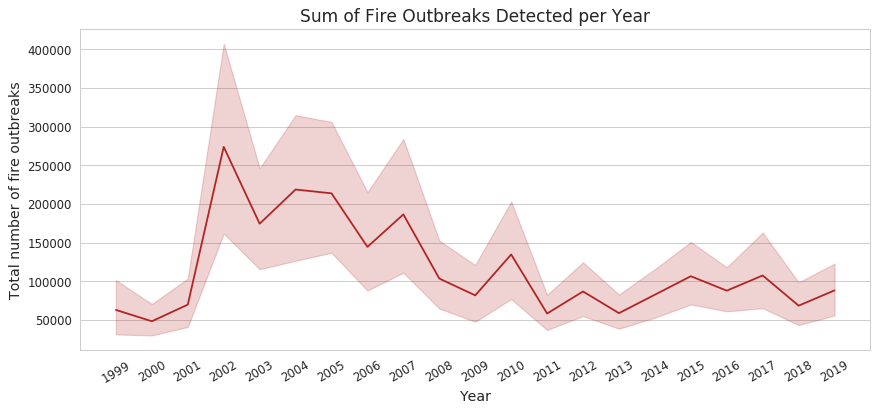

In [4]:
# Generating years for the graph axis labels
int_year = list(range(1999, 2020))

plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.lineplot(data=amazonfires, x='year', y='firespots', estimator='sum', color="firebrick")

plt.ylabel("Total number of fire outbreaks", size="large")
plt.xlabel("Year", size="large")
plt.xticks(int_year, rotation=30)
plt.title("Sum of Fire Outbreaks Detected per Year", size="x-large")
plt.grid(axis='x')

#### **Month**

The graph below shows the **average** of fire outbreaks in Amazon detected by INPE for each month in the range of 1999 to 2019. The confidence band is of 95%.

The graph shows that the second semester of the year, in average is the most affected by fire outbreaks, the top 3 being September, August and October.

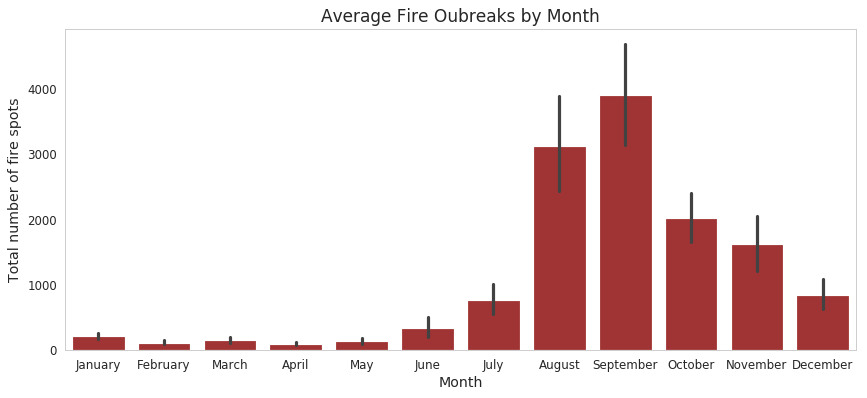

In [5]:
# Month names in full length
fullmonth = ['January', 'February', 'March', 'April', 'May', 'June',
             'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

#sns.lineplot(data=amazonfires, x='month', y='firespots', color="firebrick")    
sns.barplot(data=amazonfires, x='month', y='firespots', color="firebrick")

plt.grid(False)
plt.ylabel("Total number of fire spots", size="large")
plt.title("Average Fire Oubreaks by Month", size="x-large")
plt.xlabel("Month", size="large")
plt.xticks(ticks=amazonfires['month'].unique()-1, labels=fullmonth);

#### **State**

It is also important to know which states are the most affected by the fires. The figure below shows the **sum** of fire outbreaks for each state for all the years in the dataset. **Para** and **Mato Grosso** are the most affected states in Brazil by the Amazon fires, **having at least twice the amount of fire outbreaks of others combined.**

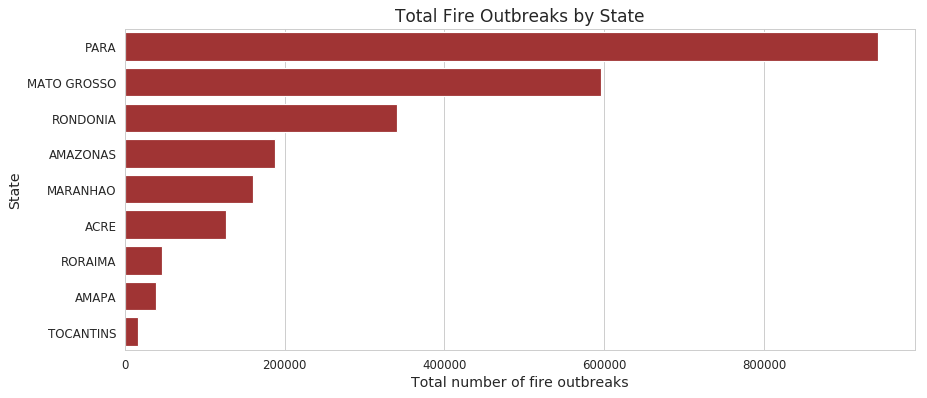

In [6]:
legal_amazon = (
    amazonfires[['state','firespots']].groupby('state',as_index=False)
    .sum()
    .sort_values('firespots',ascending=False)['state']
    .values
)

plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.barplot(data=amazonfires, x='firespots', y='state', estimator=sum, color='firebrick', order=legal_amazon, ci=None)    

plt.ylabel("State", size="large")
plt.title("Total Fire Outbreaks by State", size="x-large")
plt.xlabel("Total number of fire outbreaks", size="large");

### 1.4.2 - Combining features

Having a better grasp of the problem and the current situation. It's time to dig deeper into the data.

#### **State and Year**

Let's analyse these two features together. How is the behavior of each state over the years?

The graphs below show the **sum** of fire outbreaks for each state.

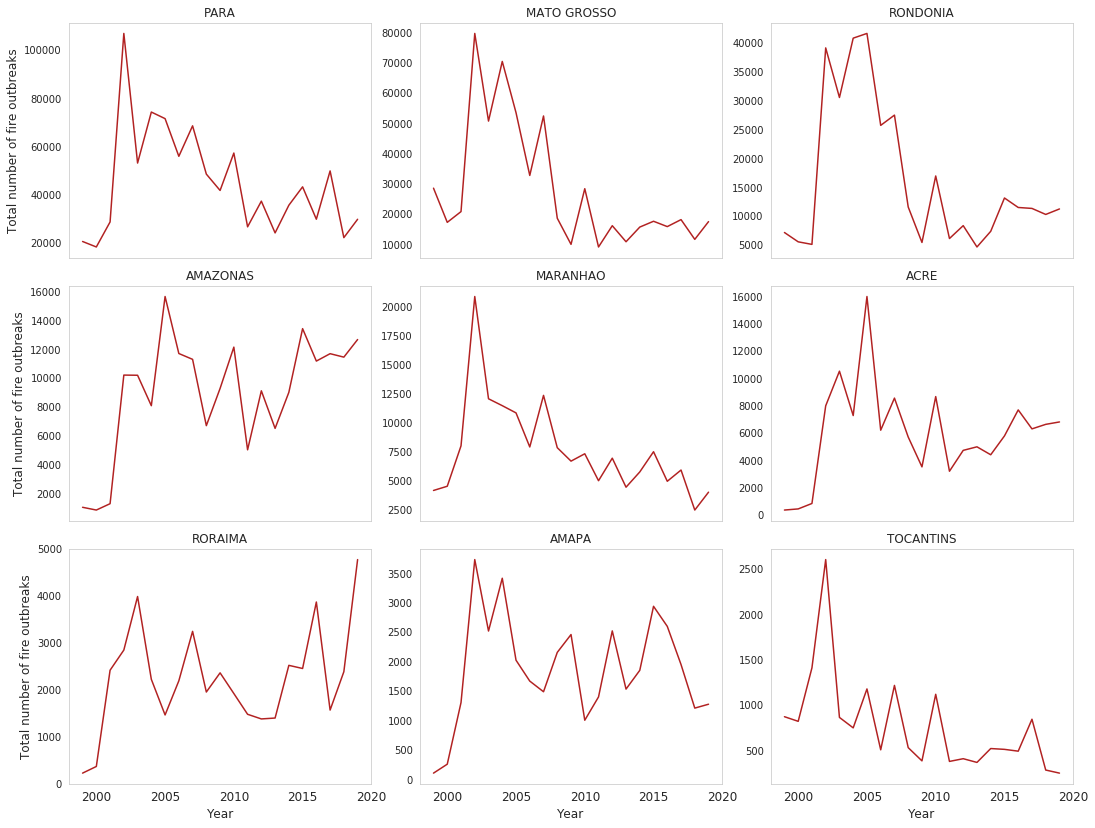

In [7]:
legal_amazon = (
    amazonfires[['state','firespots']].groupby('state',as_index=False)
    .sum()
    .sort_values('firespots',ascending=False)['state']
    .values
)

fig, ax = plt.subplots(3, 3, figsize=(18, 14), sharex=True)
sns.set_style("whitegrid")
ax = ax.flat

i=0
for x in legal_amazon:
    sns.lineplot(data=amazonfires[amazonfires['state'] == x], x='year',
                 y='firespots', estimator='sum', ax=ax[i], color='firebrick', ci=None)
    ax[i].set_title(x, size='large')
    ax[i].set_xlabel("Year", size='large')
    ax[i].set_xticks([2000, 2005, 2010, 2015, 2020])
    ax[i].grid(False)
    ax[i].set_xticklabels([2000, 2005, 2010, 2015, 2020], fontsize='large')
    
    if i==0 or i==3 or i==6:
        ax[i].set_ylabel("Total number of fire outbreaks", size='large')
    else:
        ax[i].set_ylabel("")
    
    i += 1

plt.subplots_adjust(wspace=0.16, hspace=0.12)

**Insights from graph:**
- It seems that the peak we had previously noted in 2002 was mainly caused by the fires in Para, Mato Grosso and Rondonia. These 3 states had a peak in 2002 and gradually decrease fire outbreaks numbers until 2011.

- Maranhao, Acre and Tocantins show this same behavior, but on a smaller scale.

- Amazonas does not seem to have the same behavior. For this state, the outbreaks of fire decrease from 2002 to 2011, and then increase again, reaching close to the worst months so far. Same thing for Roraima, which rechead the largest amount of fire outbreaks in 2019.

- Amapa does not show a clear behavior.

#### **State and month**

Now let's take a look in the fire outbreak's behavior throughout the year. The graphs below show the **average** of outbreaks per month for each state (confidence band = 95%).

The fire outbreaks seem to be concentrated in the second semester of the years for all states, except for Roraima, which is weird. For this state, the peak in fire outbreaks seems to be lagging in a few months, starting softly in October and peaking in March of the following year.

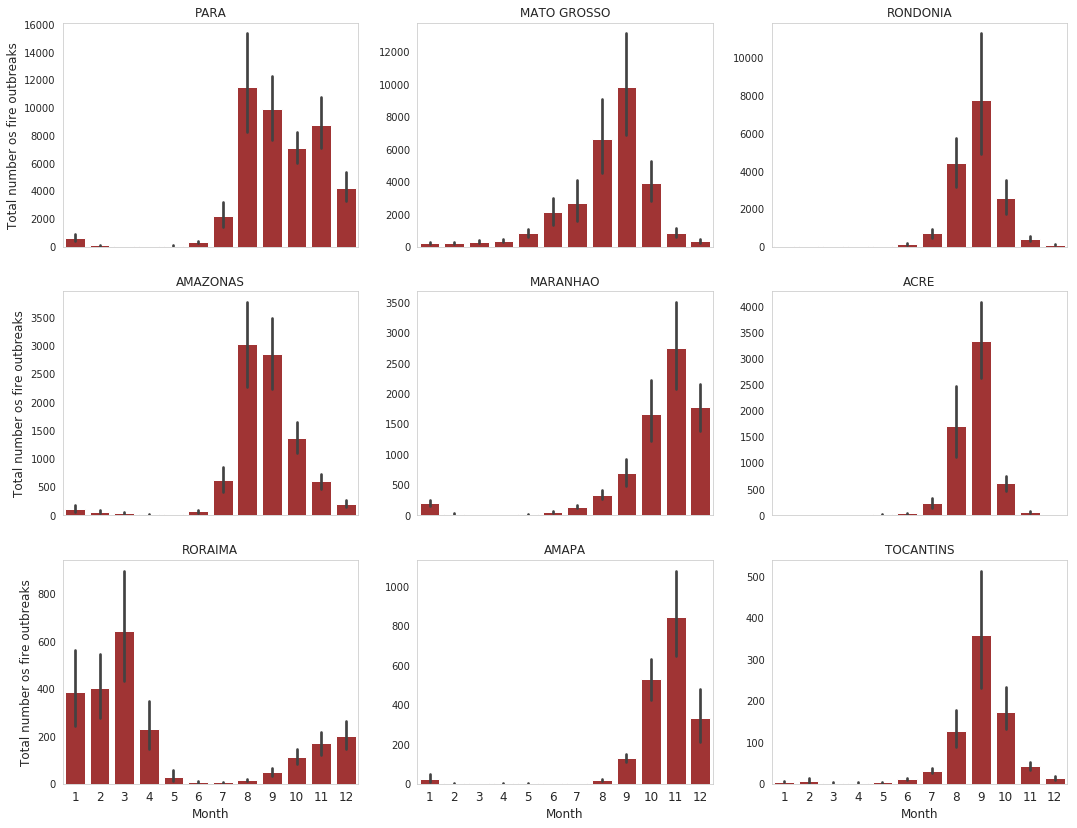

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(18, 14), sharex=True)
sns.set_style("whitegrid")
ax = ax.flat

i=0
for x in legal_amazon:
    #sns.lineplot(data=amazonfires[amazonfires['state'] == x], x='month',
    #            y='firespots', ax=ax[i], color='firebrick')
    sns.barplot(data=amazonfires[amazonfires['state'] == x], x='month',
                y='firespots', ax=ax[i], color='firebrick')
    ax[i].set_title(x, size='large')
    ax[i].grid(False)
    ax[i].set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12], fontsize='large');
    
    if x in ['PARA', 'AMAZONAS', 'RORAIMA']:
        ax[i].set_ylabel("Total number os fire outbreaks", size='large')
    else:
        ax[i].set_ylabel("");
    
    if x in ['RORAIMA', 'AMAPA', 'TOCANTINS']:
        ax[i].set_xlabel("Month", size='large')
    else:
        ax[i].set_xlabel("");
    
    i += 1

In order to know more about the peak month in each state, I put this information in a map using Tableau:

In [9]:
%%HTML
<div class='tableauPlaceholder' id='viz1576427659329' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;am&#47;amazon-fires-map&#47;DashboardMonthofpeak&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='amazon-fires-map&#47;DashboardMonthofpeak' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;am&#47;amazon-fires-map&#47;DashboardMonthofpeak&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1576427659329');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='620px';vizElement.style.height='557px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='620px';vizElement.style.height='557px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**From this map we can see that:**
- The southernmost states, which are continental, have their peak in fire outbreaks in September. They are: Acre, Rondonia, Mato Grosso and Tocantins.
- Maranhao and Amapa have their peak in November. They are both states on the coast. 
- Para is also on the coast, and if you analyse the bar plots above, this state has actually two peaks: the biggest in August, together with Amazonas, and the other in November, with the coastal states. Para has a large territory and apparently has similarities with Amazonas and the coastal states. Maybe these peaks refer to different fire clusters locations, one in the continental part of the State, and the other on the coast.
- As previously noted, Roraima has a very different behavior, with a lag of a few months when compared to the other states (peaking only in March!).

#### **Year, Month and State**

It is interesting to note what is the behavior per month and how it is changing over the years. The heatmaps below show the amount of fire outbreaks over the years, for each month of the year for each state.

The color scale is not shared, so we can better see the individual behavior for each state.

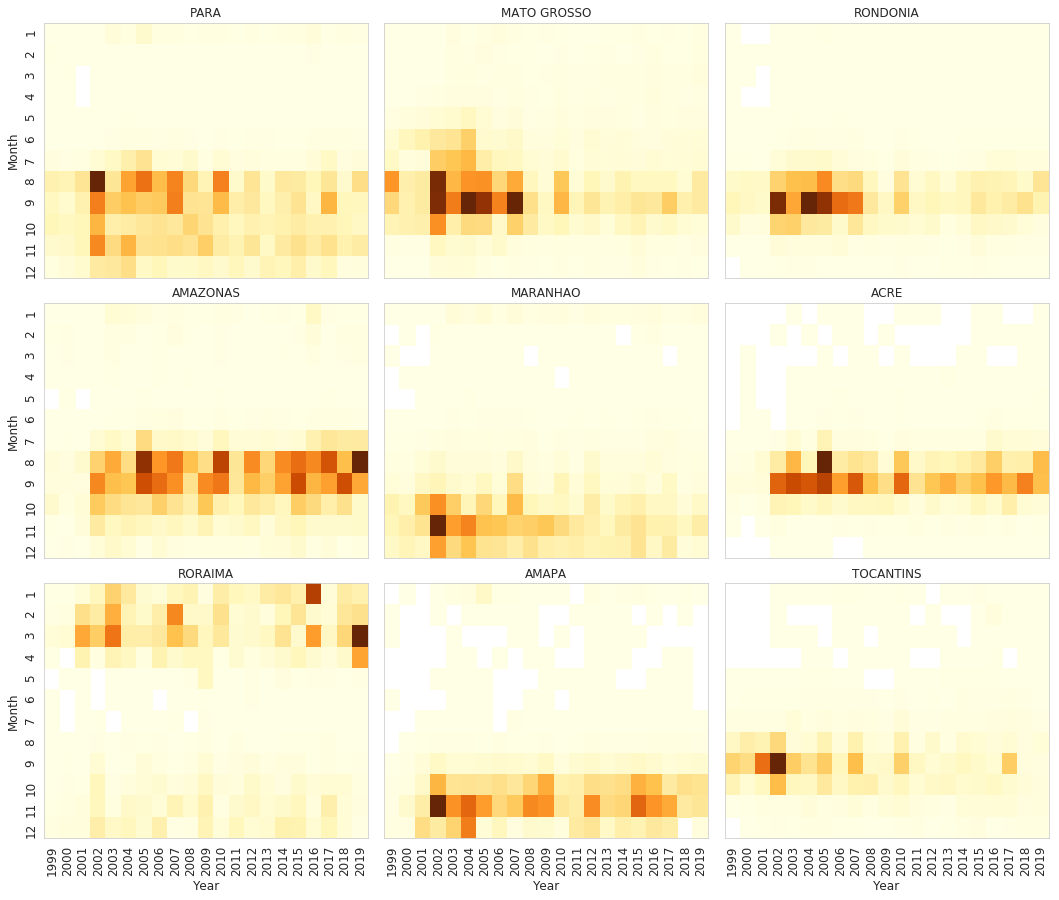

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(18, 15), sharex=True, sharey=True)
ax = ax.flat

i=0
for x in legal_amazon:
    st_month_year_pivot = amazonfires[amazonfires['state'] == x].pivot_table(values='firespots', index='month', columns='year', aggfunc='sum')
    
    sns.heatmap(data=st_month_year_pivot, xticklabels=int_year, ax=ax[i], cmap='YlOrBr', cbar=False)
    
    ax[i].set_ylabel("Month", size='large')
    ax[i].set_xlabel("Year", size='large')
    ax[i].set_title(x, size='large')
    ax[i].set_xticklabels(int_year, fontsize='large')
    ax[i].set_yticklabels([1,2,3,4,5,6,7,8,9,10,11,12], fontsize='large')
    
    for _, spine in ax[i].spines.items():
        spine.set_visible(True)
        
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
    
    i += 1
    

for a in [ax[0], ax[3], ax[6]]:
    a.yaxis.set_visible(True)
    
for a in [ax[6], ax[7], ax[8]]:
    a.xaxis.set_visible(True)
    
plt.subplots_adjust(wspace=0.05, hspace=0.1)

**Insights from the plot**:
- Amazonas showed a peak in August 2019. The heatmap shows that the amount of fire outbreaks recorded in this month is above the average for this period of the year (the highest since 1999), which may indicate the presence of burns through unnatural causes.

- Roraima showed a similar behavior in March and April 2019. This amount of fires in these months was above average for this period of the year. March was marked with the largest number of fire spots in this State history since 1999. 

- Para and Amazonas are the states with the largest periods of fires throughout the year, reaching almost an entire semester. These are also the largest states of the Legal Amazon, in terms of area.

- Para, Mato Grosso, Rondonia, Maranhao and Tocantins show important reductions in the number of fire outbreaks compared to the early years of data collection. Amazonas, Acre, Roraima and Amapa do not show the same behavior.

- December 2019 does not have all data, since they were extracted from the site during this month.

### 1.4.3 - Previous Years' Metrics

I want to compare the most recent years with historical data.

To achieve this, the next plots show in the left the reference year represented in columns, vs the minimum, average and maximum of all previous years (calculations exclude the reference year). And in the right plot, the maximum is represented by the 100% for each month, while the average and 2017 values are represented in relation to the maximum. 

The graphs were made to 2017, 2018 and 2019.

In [11]:
# Function to make the calculations
def previous_years_metrics(ds, year):
    ds_grouped = (
        ds[ds['year'] < year].groupby(['year','month'])
        .sum()
        .groupby('month')
        .aggregate([min, max, np.mean])
    )['firespots']
    
    ds_grouped[f'{year}'] = ds[ds['year'] == year].groupby('month')['firespots'].sum()
    ds_grouped[f'{year}_max'] = (ds_grouped[f'{year}'] / ds_grouped['max']) *100
    ds_grouped['avg_max'] = (ds_grouped['mean'] / ds_grouped['max']) *100
    
    return ds_grouped

In [12]:
# Applying the function
month_statistics_2017 = previous_years_metrics(amazonfires, 2017)
month_statistics_2018 = previous_years_metrics(amazonfires, 2018)
month_statistics_2019 = previous_years_metrics(amazonfires, 2019)

In [13]:
# Funcion to build the plots
def plot_year_row(dataset, year, ax1, ax2):
    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    xticks = mtick.FormatStrFormatter(fmt)
    months = dataset.index
    
    ax1.bar(dataset.index, dataset[f'{year}'], align='center', color='whitesmoke', alpha=1, label=f"{year}", 
            edgecolor='grey', linewidth=1)
    sns.lineplot(data=dataset, x=dataset.index, y='min', color="goldenrod", lw=4, alpha=0.7, label="Minimum", ax=ax1)
    sns.lineplot(data=dataset, x=dataset.index, y='mean', color="orangered", lw=4, alpha=0.7, label="Average", ax=ax1)
    sns.lineplot(data=dataset, x=dataset.index, y='max', color="firebrick", lw=4, alpha=0.7, label="Maximum", ax=ax1)
    ax1.set_title(f"{year} vs Previous Years", size='large')
    ax1.set_xlabel("Month", size='large')
    ax1.set_ylabel("Fire outbreaks", size='large')
    ax1.grid(False)
    ax1.set_xticks(months)
    ax1.set_xticklabels(months, fontsize='large')
    ax1.legend(loc="upper left")

    ax2.bar(dataset.index, dataset[f'{year}_max'], align='center', color='whitesmoke', alpha=1, label=f"{year}", 
            edgecolor='grey', linewidth=1)
    sns.lineplot(data=dataset, x=dataset.index, y='avg_max', color="orangered", lw=4, alpha=0.7, label="Average", ax=ax2)
    ax2.axhline(y=100, color='firebrick', linestyle='-', lw=3.5, alpha=0.8, label="Maximum")
    ax2.set_title(f"{year}, vs Previous Years (percentage of maximum)", size='large')
    ax2.set_xlabel("Month", size='large')
    ax2.set_ylabel("Fire Outbreaks (% of maximum)", size='large')
    ax2.yaxis.set_major_formatter(xticks)
    ax2.grid(False)
    ax2.set_xticks(months)
    ax2.set_xticklabels(months, fontsize='large')
    ax2.legend(loc="upper right")

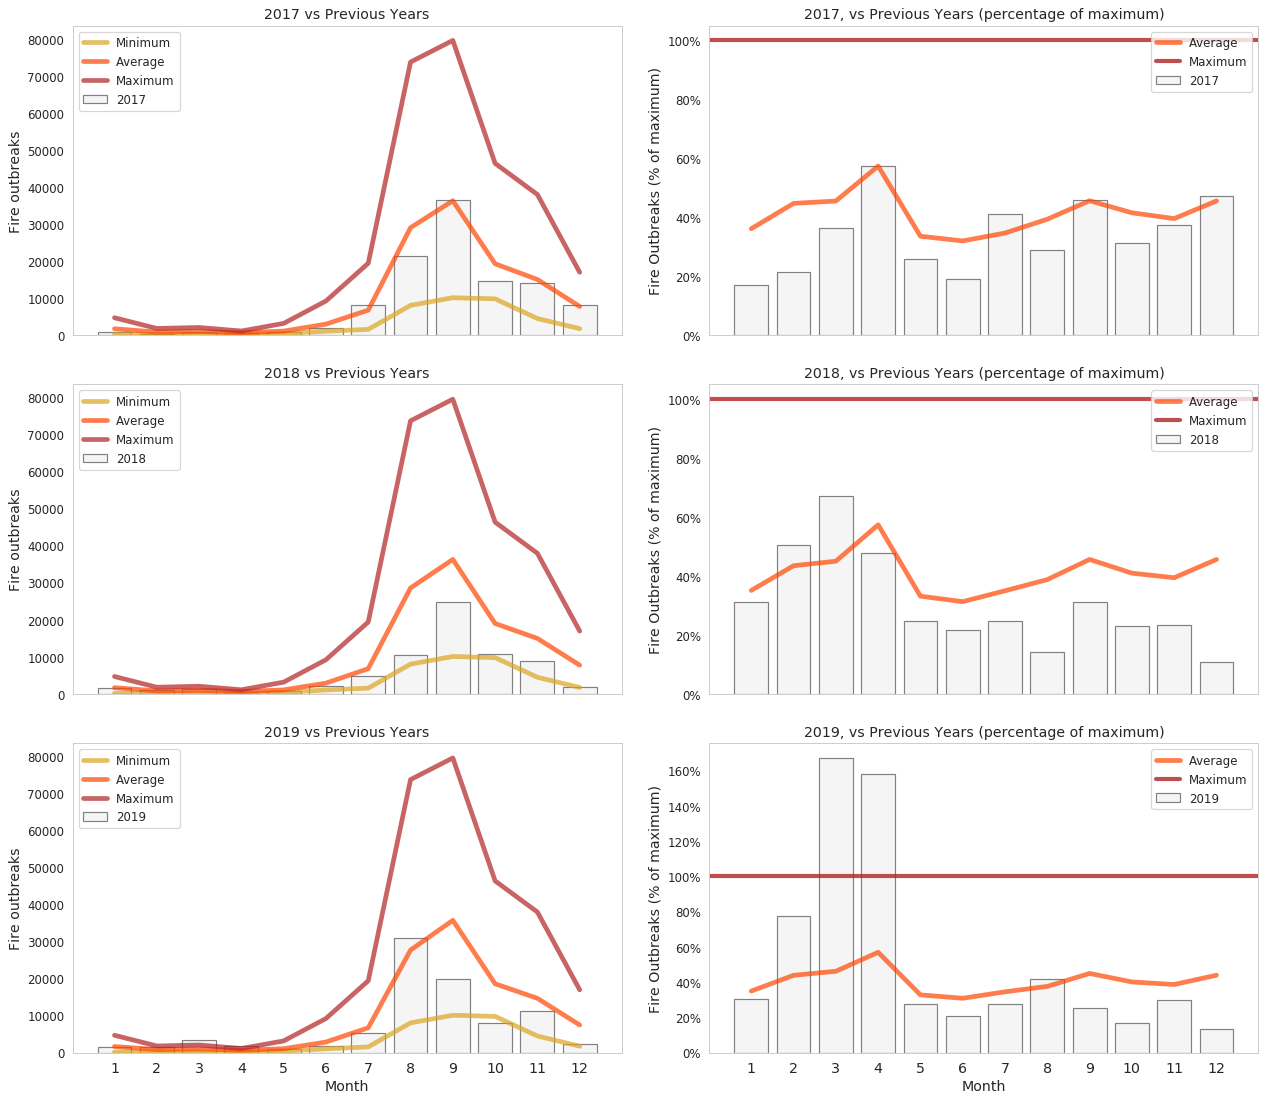

In [14]:
# Applying the function
fig, ax = plt.subplots(3, 2, figsize = (18,16), dpi=85, sharex=True)
sns.set_style("whitegrid")
plt.subplots_adjust(wspace=0.16, hspace=0.16)
ax = ax.flat

plot_year_row(month_statistics_2017, 2017, ax[0], ax[1])
plot_year_row(month_statistics_2018, 2018, ax[2], ax[3])
plot_year_row(month_statistics_2019, 2019, ax[4], ax[5])

**Insights from these graphs**:

- In **2017**, only July was above the average of fire outbreaks, April, September and December got close to it. The other months were below the average. No month has come close to the maximum.
- In **2018**, February and March had more fire outbreaks than the average of previous years. The rest of the months didn't come close to that.
- **2019** was the only of these years to surpass the maximum of previous years in March and April. Both had burnings above 150% of the maximum this year. Also, February and August reached the previous years' average for each month. The rest of the months were below average. Data from December is incomplete so it's not possible to analyse it yet.
- It is important to remember that these Maximum, Average and Minimum calculations include the years around 2002 ~ 2005, which had unnaceptable amounts fire outbreaks. We shouldn't use those years values to conclude that the situation is better now.

---
---

# 2 - Deforestation Area (PRODES)

## 2.1 - Dataset Summary

### General information
- Format: CSV
- Number of rows: 16
- Number of columns: 11
    
### Features in the dataset
Data extracted from a Brazilian website. Features are in Portuguese. Data is already pivoted, will be unpivoted later.
- **Ano/Estados**: Year of occurrence
- **AC, AM, AP, MA, MT, PA, RO, RR, TO**: States of Legal Amazon
- **AMZ LEGAL**: Sum of all states
- Values: deforested area in **squared kilometers (km²)**.

---

## 2.2 - Reading the Data

In [15]:
# Different encoding due to brazilian data
pivot_amazon_def = pd.read_csv("../input/brazilian-amazon-rainforest-degradation/def_area_2004_2019.csv", encoding='LATIN1')

# Dropping aggregated column
pivot_amazon_def.drop('AMZ LEGAL', axis=1, inplace=True)

#Renaming columns as they are in the first dataset
column_names = ["year", "ACRE", "AMAZONAS", "AMAPA", "MARANHAO",
                "MATO GROSSO", "PARA", "RONDONIA", "RORAIMA", "TOCANTINS"]
pivot_amazon_def.columns = column_names

pivot_amazon_def.head()

,year,ACRE,AMAZONAS,AMAPA,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS
0,2004,728,1232,46,755,11814,8870,3858,311,158
1,2005,592,775,33,922,7145,5899,3244,133,271
2,2006,398,788,30,674,4333,5659,2049,231,124
3,2007,184,610,39,631,2678,5526,1611,309,63
4,2008,254,604,100,1271,3258,5607,1136,574,107


Data are already pivoted, and I need them unpivoted.

In [16]:
amazon_def_area = pivot_amazon_def.melt(id_vars=['year'], var_name='state', value_name='defarea')
amazon_def_area.head()

,year,state,defarea
0,2004,ACRE,728
1,2005,ACRE,592
2,2006,ACRE,398
3,2007,ACRE,184
4,2008,ACRE,254


---

## 2.3 - Analysis

#### Year

The graphs below show, in the left, the **sum** of deforested area (km²) in Brazilian Amazon for each year since 2004 with 95% confidence band; and in the right, the **cummulative** deforested area.

It is important to look at the cummulative because when a part of the forest is deforested (by burning, logging or any other mothod), it will hardly be recovered. First, because the space will probably be used for agriculture, livestock or mining. Second, because if an attempt is made to recover it, it would take at least a hundred years for it to regenerate with all the fauna and flora it once housed.

So, let's look at these charts!

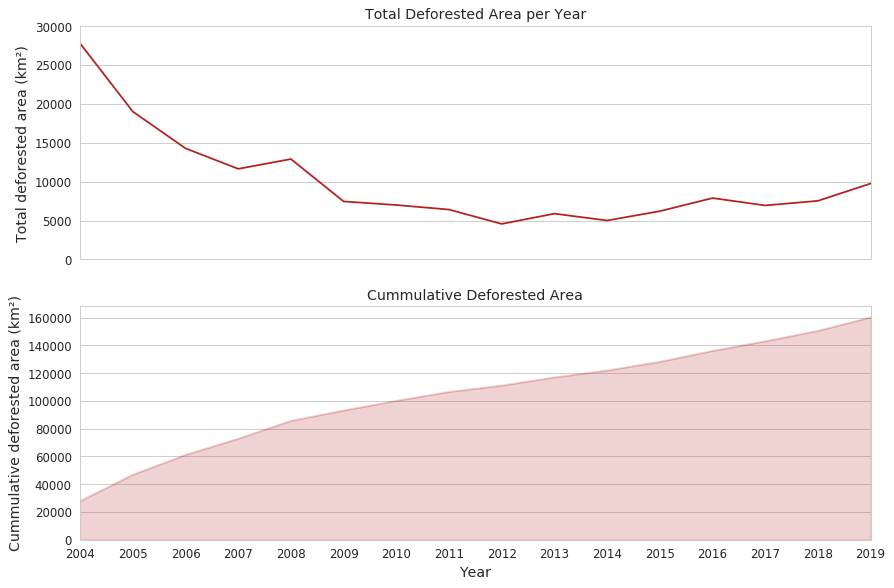

In [17]:
# Making the cummulative calculations

pivot_amazon_def['total'] = 0
pivot_amazon_def["total_cummulative"] = 0
pivot_amazon_def["total"] = pivot_amazon_def.drop("year", axis=1).sum(axis=1)
pivot_amazon_def["total_cummulative"] = pivot_amazon_def.total.cumsum()


# Ploting the graphs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12,8), dpi=85, sharex=True)
sns.set_style("whitegrid")

sns.lineplot(data=amazon_def_area, x=amazon_def_area['year'], y=amazon_def_area['defarea'], estimator='sum', color="firebrick", ci=None, ax=ax1)
ax1.set_ylabel("Total deforested area (km²)", size="large")
ax1.set_xlabel("Year", size="large")
ax1.set_title("Total Deforested Area per Year", size='large')
ax1.grid(axis='x')
ax1.set_xlim(2004,2019)
ax1.set_ylim(0,30000)

pivot_amazon_def.set_index("year")['total_cummulative'].plot.area(color='firebrick', alpha=0.2, ax=ax2)
ax2.set_ylabel("Cummulative deforested area (km²)", size="large")
ax2.set_xlabel("Year", size="large")
ax2.set_title("Cummulative Deforested Area", size='large')
ax2.grid(axis='x');
ax2.set_xticks(list(range(2004,2020)))
ax2.set_xticklabels(list(range(2004,2020)));

- First thing to note is that the area values are way more smooth than the fire outbreaks ones. 
- The left graph shows a very important peak in 2004, with values above 30k km² of deforestation. Then, the numbers decrease and seem to stabilize, staying below 8k km² of deforestation from 2009 to 2018. In 2019, however, this number reached 10k km² again, which hadn't happened since 2008 (it is important to remember that the data from 2019 is not complete, since it was extracted during this month).
- The cummulative graph shows that from 2004 until today, more than 160k km² of the Amazon rainforest has been deforested. These 15 years represented:
    - almost one sixth (17%) of the total deforestation area so far;
    - 3% of the entire Brazilian Amazon Area!

#### **State**

The figure below shows the **sum** of deforested area for each state for all the years in the dataset. 

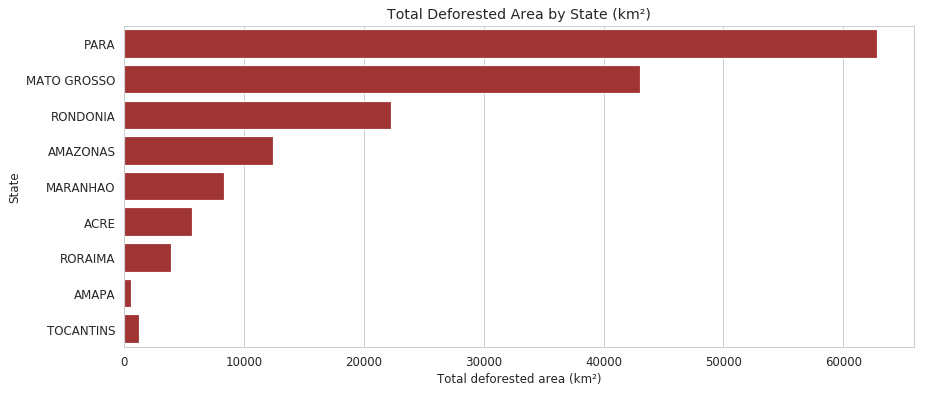

In [18]:
plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.barplot(data=amazon_def_area, x='defarea', y='state', estimator=sum, color='firebrick', order=legal_amazon, ci=None)    

plt.ylabel("State")
plt.title("Total Deforested Area by State (km²)")
plt.xlabel("Total deforested area (km²)");

Para and Mato Grosso are the most affected states in Brazil by the Amazon deforestation, having at least twice the total deforested area of others combined.
Also, although Amapa has more fire outbreaks than Tocantins (as shown in previous charts), when it comes to deforested area, Tocantins comes first.

#### **State and Year**

Let's analyse these two features together. How is the behavior of each state over the years?

The graphs below show the **sum** of deforested area for each state.

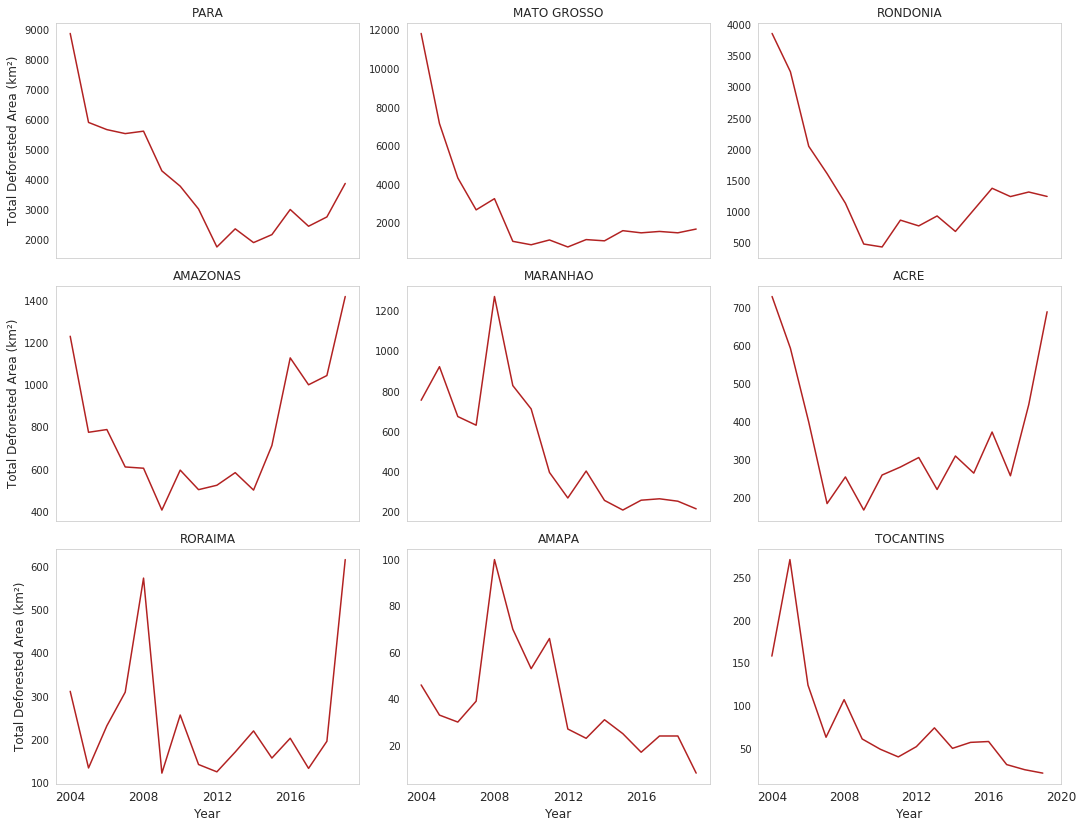

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(18, 14), sharex=True)
sns.set_style("whitegrid")
ax = ax.flat

i=0
for x in legal_amazon:
    sns.lineplot(data=amazon_def_area[amazon_def_area['state'] == x], x='year',
                 y='defarea', estimator='sum', ax=ax[i], color='firebrick', ci=None)
    ax[i].set_title(x, size='large')
    ax[i].set_xlabel("Year", size='large')
    ax[i].set_xticks([2004, 2008, 2012, 2016, 2020])
    ax[i].set_xticklabels([2004, 2008, 2012, 2016, 2020], fontsize='large')
    ax[i].grid(False)
    
    if i==0 or i==3 or i==6:
        ax[i].set_ylabel("Total Deforested Area (km²)", size='large')
    else:
        ax[i].set_ylabel("")
    
    i += 1

plt.subplots_adjust(wspace=0.16, hspace=0.12)

**Insights from these graphs:**
- First thing to note is that 2019 was an outlier year for Amazonas, Acre and Roraima, with the deforested area getting close or even surpassing their maximums recorded in last decade.

- Para also showed an important increase in the deforested area. It was not even close to its worst years, but proportionally, from all states, it was the one that deforested most in 2019, reaching 4k km². Its trends in last years were indeed of increasing.

- Mato Grosso and Rondonia have the same deforested area for a few years.

- Maranhao, Amapa and Tocantins show a decrease in their deforested area.

---
---

# 3 - Comparing datasets

## 3.1 - Fire Outbreaks Vs Deforested Area

In this kernel we are analyzing one of the many methods of forest degradation (fire), and the result, which is the deforestation area in km². Let's look at them together now to see how they vary with each other.

In [20]:
amazon_def_by_year = amazon_def_area.groupby("year", as_index=False).sum()

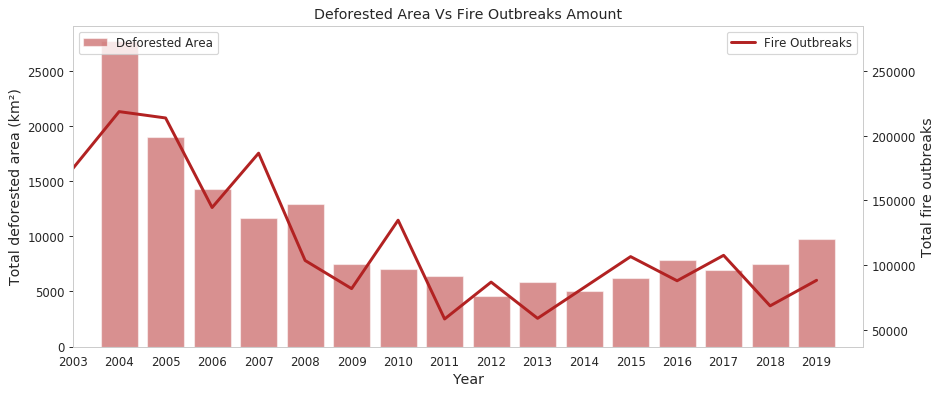

In [21]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

ax.bar(amazon_def_by_year['year'], amazon_def_by_year['defarea'], color='firebrick', alpha=0.5, label='Deforested Area')
plt.grid(False)
ax.legend(loc="upper left")
ax.set_ylabel("Total deforested area (km²)", size="large")
ax.set_xlabel("Year", size="large")
ax.set_title("Deforested Area Vs Fire Outbreaks Amount")
#ax.grid(axis='x')

ax2 = ax.twinx()
sns.lineplot(x=amazonfires['year'], y=amazonfires['firespots'], estimator='sum', color="firebrick", ci=None, ax=ax2, label='Fire Outbreaks', lw=2.5)
ax2.set_xticks(ticks=list(range(2003, 2020)))
ax2.set_xlim(2003, 2020)
ax2.set_ylabel("Total fire outbreaks", size="large")
plt.grid(False)
ax2.legend();

I am interested in the correlation between these data.

In [22]:
#grouping in the granularity of interest
comb = amazonfires[amazonfires['year'] > 2003].groupby('year').sum()
comb['area'] = amazon_def_by_year.groupby('year').sum()['defarea']

#calculating the correlation
comb[["firespots", "area"]].corr()

,firespots,area
firespots,1.000000,0.833778
area,0.833778,1.000000


As expected, fire outbreaks have a pretty considerable correlation with the deforested area throughout the years (correlation coefficient of 0.83). But it also shows that it is not the only thing important to the forest degradation.
As previously said, fires are not the only method to degradate a forest and prepare to any type of economic activity. 

---

## 3.2 - El Niño and La Niña

Climate phenomena can be expected to influence the burning of the Amazon rainforest. For that, I decided to evaluate 2 of the most important climatic phenomena: El Niño and La Niña.

**El Niño** and **La Niña** are natural weather patterns that result from interactions between the ocean and the atmosphere. Both involve anomalies in ocean surface temperatures and atmospheric circulation, resulting in climatic extremes around the world. While El Niño is the abnormal warming of the Equatorial Pacific Ocean, La Niña is the reverse, causing the Equatorial Pacific waters to cool. Source: [EMBRAPA](https://www.embrapa.br/busca-de-publicacoes/-/publicacao/986018/de-que-modo-o-el-nino-influencia-a-amazonia-um-experimento-de-exclusao-de-chuva)

**El Niño** produces some hot and humid air masses, which generate more rainfall in some regions and drought periods in other locations, such as the Amazon, Brazilian Northeast and other countries such as Australia and Indonesia.

**La Niña** is the exactly reverse phenomenon: it represents an abnormal cooling of the waters of the Pacific Ocean due to the increased force of the trade winds. In Brazil, La Niña has the opposite effects, with the intensification of rainfall in the Amazon, the Northeast and parts of the Southeast. In addition, it causes temperatures to fall in North America and Europe.

Let's analyze their effects!

First, I extrated data of occurrences of these climatic phenomena since 1999. They are characterized by Sea surface Temperature (SST) and categorized between Weak (with a 0.5 to 0.9 SST anomaly), Moderate (1.0 to 1.4), Strong (1.5 to 1.9) and Very Strong (≥ 2.0) events.

Source: [Golden Gate Weather](https://ggweather.com/enso/oni.htm)

In [23]:
# Different encoding due to brazilian data
el_nino_la_nina_records = pd.read_csv("../input/brazilian-amazon-rainforest-degradation/el_nino_la_nina_1999_2019.csv", encoding='LATIN1')

In [24]:
#create a new column with alpha for the graph
alpha_map = {
    "Weak":0.2,
    "Moderate": 0.3,
    "Strong": 0.4,
    "Very Strong":0.5
}

el_nino_la_nina_records['alpha'] = el_nino_la_nina_records["severity"].map(alpha_map)

In [25]:
#separating between El Niño and La Niña
el_nino_records = el_nino_la_nina_records[el_nino_la_nina_records['phenomenon'] == 'El Nino'].copy()
la_nina_records = el_nino_la_nina_records[el_nino_la_nina_records['phenomenon'] == 'La Nina'].copy()

Now, let's analyze fire outbreaks Vs these weather phenomena. The more transparent the band is, the weaker the phenomenon was in that year.

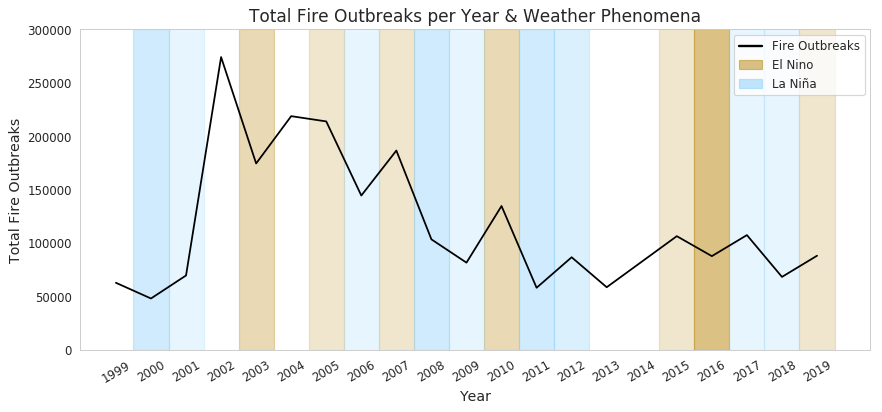

In [26]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

# Ploting El Niño and La Niña
for i, row in el_nino_records.iterrows(): #generate a list of rows
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='darkgoldenrod', edgecolor=None, label='El Niño')

for i, row in la_nina_records.iterrows(): #generate a list of rows
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='lightskyblue', edgecolor=None, label='La Niña')


    
# Ploting the line
sns.lineplot(x=amazonfires['year'], y=amazonfires['firespots'], estimator='sum', color="black", ci=None, ax=ax)
ax.grid(False)

plt.xticks(ticks=list(range(1999, 2020)), rotation=30)

plt.title("Total Fire Outbreaks per Year & Weather Phenomena", size="x-large")
plt.xlabel('Year', size="large")
plt.ylabel('Total Fire Outbreaks', size="large")

legend_elements = [Line2D([0], [0], color='black', lw=2, label='Fire Outbreaks'),
                   Patch(facecolor='darkgoldenrod', edgecolor='darkgoldenrod', label='El Nino', alpha=0.5),
                   Patch(facecolor='lightskyblue', edgecolor='lightskyblue', label='La Niña', alpha=0.5)]

ax.legend(handles=legend_elements)
ax.set_ylim(0,300000);

- Analyzing this graph, it is possible to see a trend of increasing the amount of fire outbreaks in years with the occurrence of El Niño Phenomenon (in 2005, 2007, 2010, 2015, 2019), with some exceptions.
- One of these exceptions was in 2016, when this phenomenon was considered "Very Strong" and the strongest occurrence in the analyzed period, the number of fire outbreaks even decreased slightly from the previous year (when there was also an El Niño occurrence, but considered "Weak") and next year (when there was an El Niña occurrence, considered "Weak" as well).
- It is also possible to see a trend of decreasing the amount of fire outbreaks in years with the occurrence of La Niña, such as in 2006, 2008, 2009, 2011, 2012 and 2018 (again, with a few exceptions). One exception example is the decrease in fire outbreaks in 2009 compared to 2008, when the same phenomenon was stronger.
- These contradictions show that, although it appears to have a correlation between these phenomena and the fires, it may not be causal or the most important factor. One thing that can happen, for example, is people taking advantage of the information about the El Niño occurrence to set fire in a criminal way.

Now, let's analyze deforested area Vs these weather phenomena. Again, the more transparent the band is, the weaker the phenomenon was in that year.

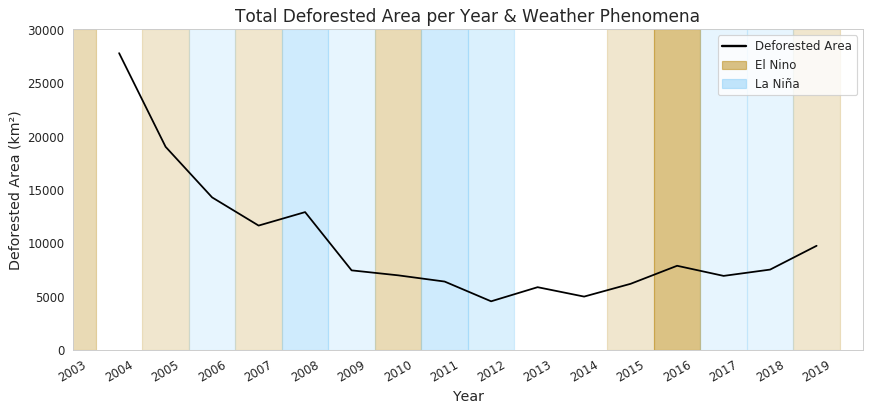

In [27]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")
for i, row in el_nino_records.iterrows(): #generate a list of rows
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='darkgoldenrod', edgecolor=None, label='El Niño')

for i, row in la_nina_records.iterrows(): #generate a list of rows
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='lightskyblue', edgecolor=None, label='La Niña')

sns.lineplot(x=amazon_def_area['year'], y=amazon_def_area['defarea'], estimator='sum', color="black", ci=None, ax=ax)
ax.grid(False)

plt.xticks(ticks=list(range(2003, 2020)), rotation=30)
ax.set_xlim(2003, 2020)

plt.title("Total Deforested Area per Year & Weather Phenomena", size="x-large")
plt.xlabel('Year', size="large")
plt.ylabel('Deforested Area (km²)', size="large")

legend_elements = [Line2D([0], [0], color='black', lw=2, label='Deforested Area'),
                   Patch(facecolor='darkgoldenrod', edgecolor='darkgoldenrod', label='El Nino', alpha=0.5),
                   Patch(facecolor='lightskyblue', edgecolor='lightskyblue', label='La Niña', alpha=0.5)]

ax.legend(handles=legend_elements)
ax.set_ylim(0,30000);

El Niño and La Niña are known to be natural phenomena that occur seasonally, that influence important factors when it comes to burnings (such as long droughts and strong winds that can facilitate the spread of fire, in the El Niño case). And it could be seen from the previous graph that, indeed, they do have a correlation with the number of fire outbreaks. This leads us to believe that a portion of Amazon rainforest degradation is due to these phenomena.

If Amazon deforestation came only from natural causes, this would be reflected on this graph too. However, unlike the fire outbreak chart, the total deforested area chart for each year does not show a clear relation to the occurrence of these climatic phenomena. Instead, the graph shows significant variations that cannot be explained by their occurrences, such as the decrease from almost 30k to 5k km² of deforested area from 2004 to 2012, and the subsequent increase from 5k to 10k km² of deforestation from 2014 to 2019, an increase of 100 % in 5 years.

This shows that a significant portion of the degradation may be due to unnatural causes such as criminal fires or other deforestation methods.

---
---

# 4 - Conclusions

Let's finally answer the questions: 

- **Is Brazilian Amazon Rainforest degradation increasing?**

<u>Compared to the beginning of the last decade</u>, it can be firmly concluded that both the fire outbreaks and total deforested area **fell significantly**. However, <u>more recent data</u> show an increase in degradated area. The amount of deforested area for 2019, mainly due to the increase in deforestation in Para, Amazonas, Acre and Roraima, was last seen back in 2008. 2019 was also marked for having broken records of burnings in the months of March and April, even comparing to years around 2002 ~ 2005, which had unnaceptable amounts fire outbreaks (**Chapters 1.4.1**, **1.4.3** and **2.3**). 


- **What is the behavior of fires: where and when do they occur?**

The states with the most fire outbreaks are Para, Mato Grosso and Rondonia, in this order. The analysis showed that the peak month of fires may vary for each state, depending on their geographic location (**Chapter 1.4.2**).


- **How correlated is the number of fire outbreaks and the deforested area?**

Fire outbreaks and deforested area have a high positive correlation coefficient of 0.83 (**Chapter 3.1**). This also means that fires are not the only important factor to the forest degradation. Indeed, fires are not the only method to degradate a forest and prepare to any type of economic activity.


- **What is the effect of climate phenomenas El Niño and La Niña on Amazon degradation?**

There is a trend of increasing the amount of fire outbreaks in years with the occurrence of El Niño Phenomenon and decrease in years with the occurrence of La Niña, with some exceptions. However, the total deforested area does not seem to be impacted by these climatic phenomena (**Chapter 3.2**). 


- **Are there evidences of natural/unnatural causes in forest degradation?** 

One cannot be sure how much of this deforestation is unnatural. But this analysis found that there are indeed some evidences of deforestation caused by human activity:

1) The amount of fire outbreaks has a strong relation with climatic phenomena (EL Niño and La Niña), but the deforested area does not have any (**Chapter 3.2**).

2) Para, Amazonas, Acre and Roraima had much larger deforestation areas than previous years, indicating that they may not have occurred naturally (**Chapter 2.3**).

3) In 15 years, 3% of the entire Brazilian Amazon area was degradated (**Chapter 2.3**). If this was a natural behavior, in 500 years the Amazon, which is millions of years old, wouldn't be a rainforest anymore.